# Topic 16: Frequency Response Of Non-minimum Phase (NMP) and Unstable Systems

In [1]:
import requests as req
URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]
try:
    %run basic_material.py
    print('Basic file found')
except:    
    print('Basic files not` found - downloading it')
    for dfile in File:
        if not os.path.isfile(dfile):
            print(dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

import cmath, sympy 
from sympy import Symbol, atan, pi, tan, sqrt, solve, log
from numpy.polynomial import Polynomial
from numpy import inf

p = Symbol('p')
z = Symbol('z')
s = sympy.Symbol('s')       # define `s` as symbol
j = complex(0,1)

try:
    import bodas
except:
    %pip install bodas
    import bodas

try: 
    import cairosvg
except:
    %pip install cairosvg
    import cairosvg

from control.matlab import tf, lsim, step, rlocus, feedback, rss, lsim, c2d
from control import bode_plot, nyquist_plot
    
from control_materials import *

Running Python: 3.12.8
Running Sympy: 1.13.2
Control Package Found
Basic file found
This is a library of useful functions for the control systems in 16.06


## MP/NMP Comparison 

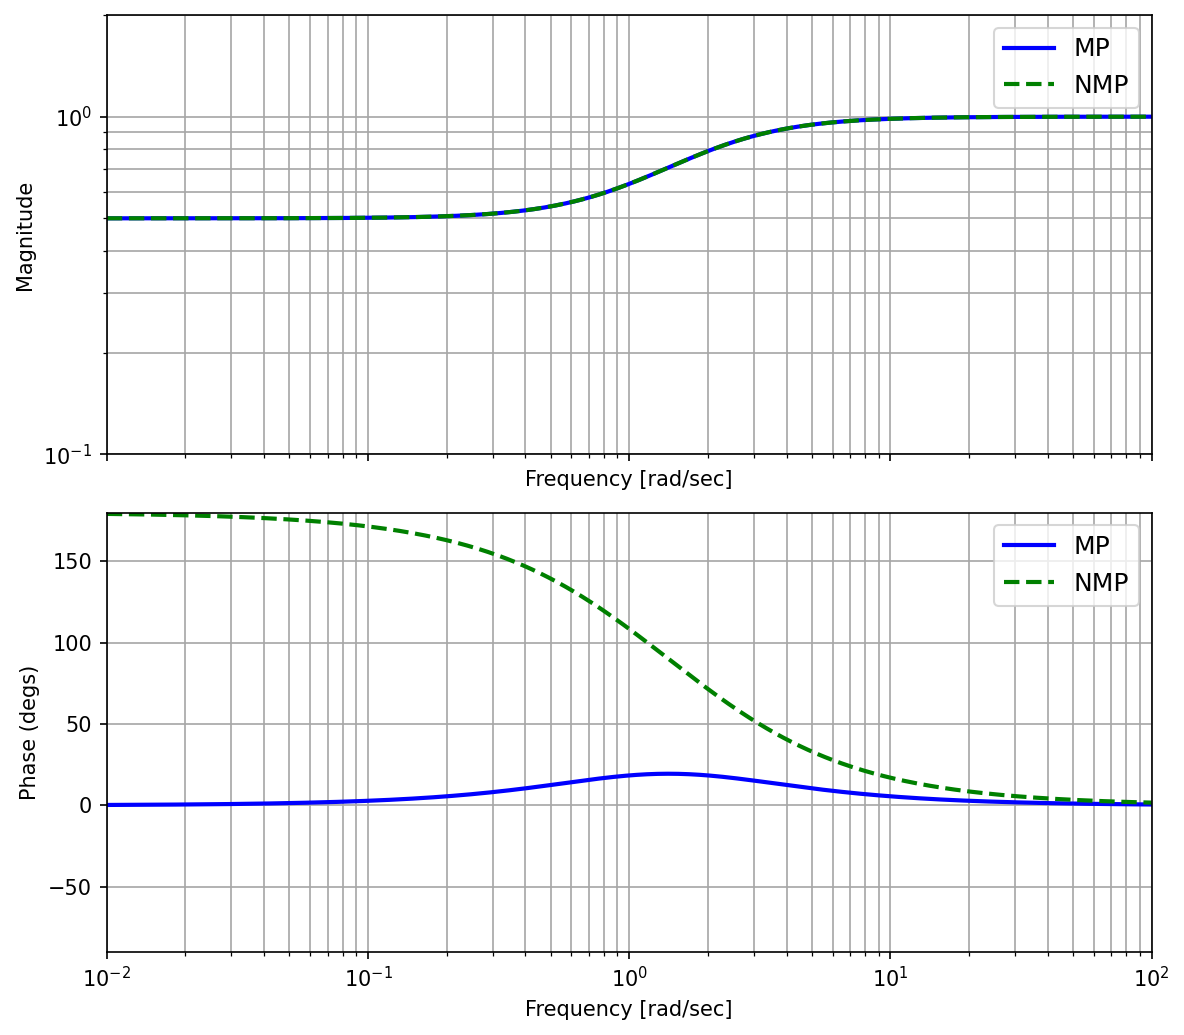

In [2]:
w = logspace(-2,2,500)
#NMP
Gs = (tf([1,1],[1,2]),tf([1,-1],[1,2]))
labels = ['MP','NMP']
colors = ['b','g']
style = ['-','--']
fig, ax = plt.subplots(2,1,figsize=(8, 7),dpi=150,sharex=True)
for kk,G in enumerate(Gs):
    [Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
    ax[0].loglog(Gw,Gm,'-',label=labels[kk],c=colors[kk],ls=style[kk])
    ax[0].set_ylim([.1,2])
    ax[0].set_xlim([.01,100])
    ax[0].set_ylabel("Magnitude")
    ax[0].set_xlabel("Frequency [rad/sec]")
    ax[0].grid(True, which="both", ls="-",color='0.65')
    ax[1].semilogx(Gw,pshift(Gp)*r2d,'-',label=labels[kk],c=colors[kk],ls=style[kk])
    ax[1].set_ylim([-90,180])
    ax[1].set_ylabel("Phase (degs)")
    ax[1].set_xlabel("Frequency [rad/sec]")
    ax[1].grid(True, which="both", ls="-",color='0.65')
    ax[0].legend(fontsize=12)
    ax[1].legend(fontsize=12)

savefig('./figs/L14_nmp.pdf',dpi=600)
plt.show()

## Stable/Unstable Comparison

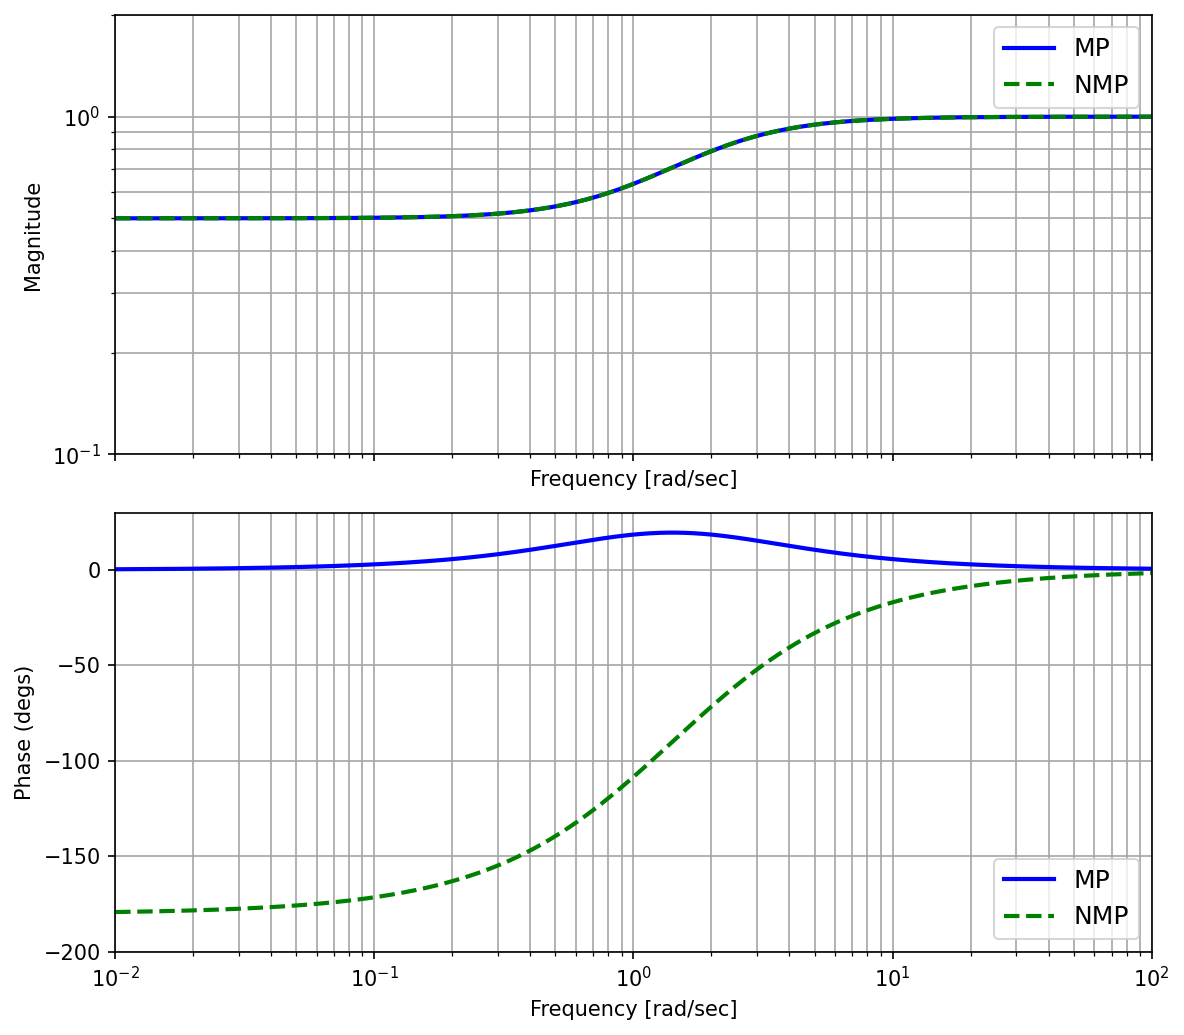

In [3]:
w = logspace(-2,2,500)
Gs = (tf([1,1],[1,2]),tf([1,1],[1,-2]))
fig, ax = plt.subplots(2,1,figsize=(8, 7),dpi=150,sharex=True)
for kk,G in enumerate(Gs):
    [Gm,Gp,Gw] = bode_plot(G,plot=False,omega=w)
    ax[0].loglog(Gw,Gm,'-',label=labels[kk],c=colors[kk],ls=style[kk])
    ax[0].set_ylim([.1,2])
    ax[0].set_xlim([.01,100])
    ax[0].set_ylabel("Magnitude")
    ax[0].set_xlabel("Frequency [rad/sec]")
    ax[0].grid(True, which="both", ls="-",color='0.65')
    ax[1].semilogx(Gw,pshift(Gp)*r2d,'-',label=labels[kk],c=colors[kk],ls=style[kk])
    ax[1].set_ylim([-200,30])
    ax[1].set_ylabel("Phase (degs)")
    ax[1].set_xlabel("Frequency [rad/sec]")
    ax[1].grid(True, which="both", ls="-",color='0.65')
    ax[0].legend(fontsize=12)
    ax[1].legend(fontsize=12)
    
savefig('./figs/L14_uns.pdf',dpi=600)
plt.show()